In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replaces the blanks with 0 as they are new users so no totak charges are recorded

In [90]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["Totalcharges"] = df["TotalCharges"].astype("float")

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#we use the second sum to check is there is any value in the whole data is null or not 

In [92]:
df.isnull().sum().sum()

np.int64(0)

In [93]:
 df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Totalcharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [94]:
df["customerID"].duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: customerID, Length: 7043, dtype: bool>

#now here we coverted senior citizens 0 or 1 value to YES or NO

In [95]:
def conv(value):
    if value==1:
        return"yes"
    else:
        return"no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)


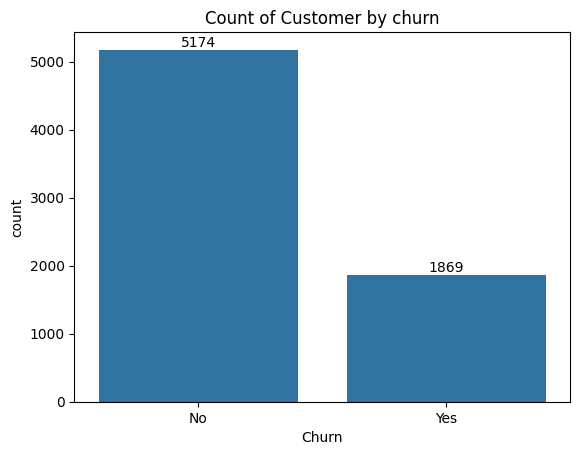

In [96]:
ax=sns.countplot(x = "Churn",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by churn")
plt.show()


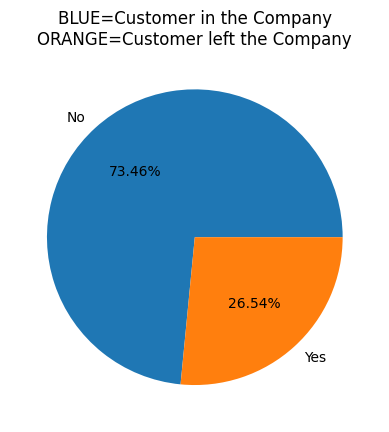

In [97]:
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels= gb.index, autopct="%1.2f%%")
plt.title("""BLUE=Customer in the Company
ORANGE=Customer left the Company""")
plt.show()


# From the chart we can see that 73.46% are in the company AND 26.54% are who left out the company

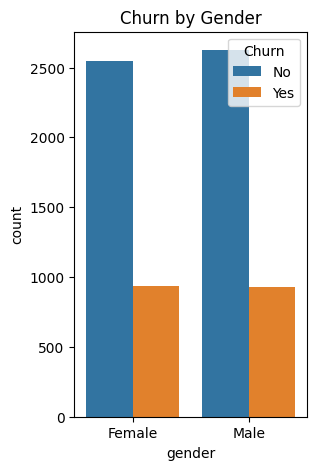

In [98]:
plt.figure(figsize=(3,5))
sns.countplot(x = "gender",data =df,hue="Churn")
plt.title("Churn by Gender")
plt.show()

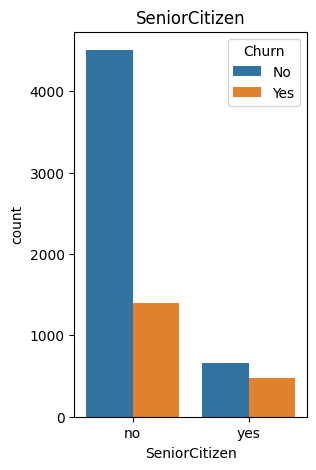

In [99]:
plt.figure(figsize=(3,5))
sns.countplot(x = "SeniorCitizen",data =df,hue="Churn")
plt.title("SeniorCitizen")
plt.show()

Text(0.5, 1.0, 'Count of Customer by SeniorCitizen')

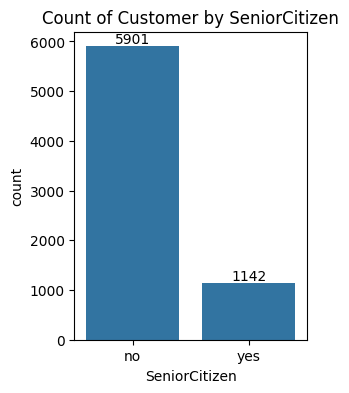

In [100]:
plt.figure(figsize=(3,4))
ax=sns.countplot(x="SeniorCitizen",data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by SeniorCitizen")

#Comparitive a greater percentage of people in SeniorCtizen have churned

<function matplotlib.pyplot.show(close=None, block=None)>

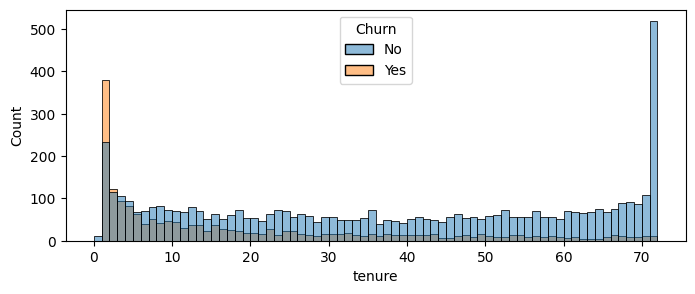

In [101]:
plt.figure(figsize=(8,3))
sns.histplot(x = "tenure",data = df,bins= 72,hue = "Churn")
plt.show

#peoplr who have used to left company in the starting monthes and the people used our services for a long time have stayed

Text(0.5, 1.0, 'Count of Customer by Contract')

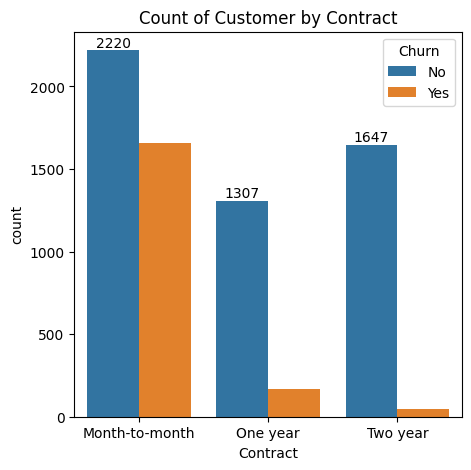

In [102]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x="Contract",data = df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")

#The people who have contracts with us month to month have more churn out than the people who have our year to year contract

In [103]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Totalcharges'], dtype=object)

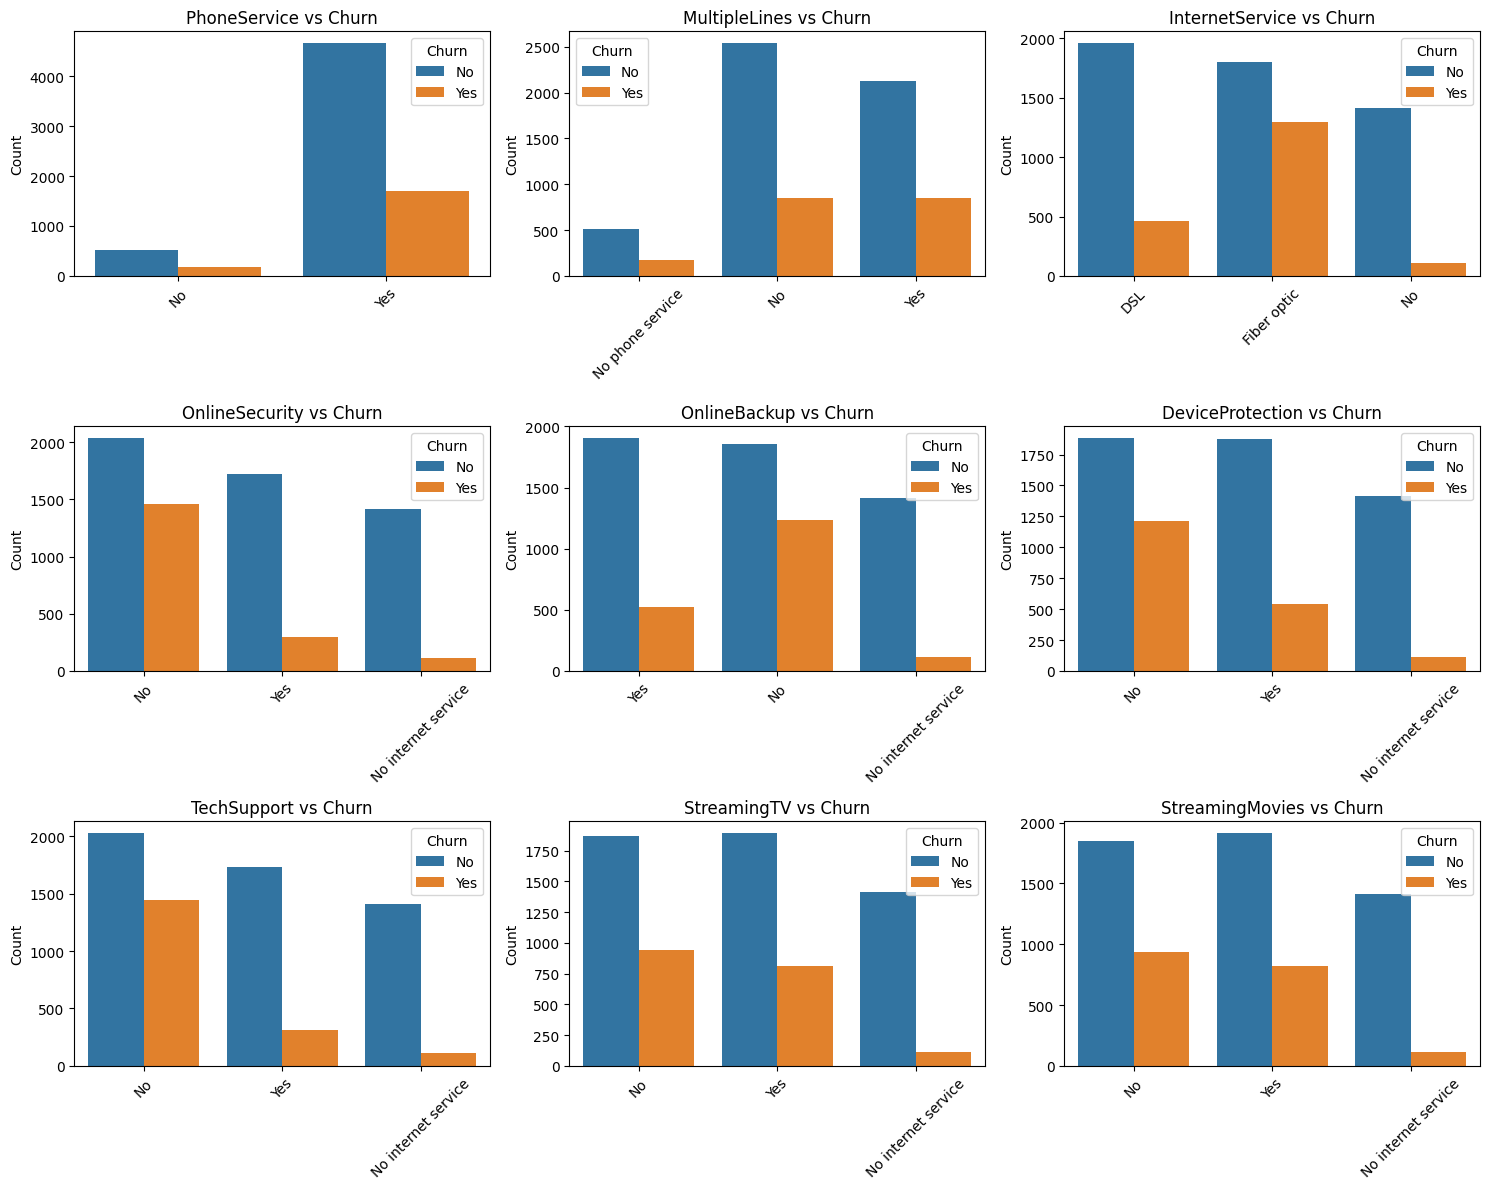

In [104]:
# Define the columns you want to plot
features = ['PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots: 3 rows x 3 columns for 9 plots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()  # Flatten the 2D axes array into 1D for easier indexing

# Create a countplot for each feature
for i, col in enumerate(features):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels if needed
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any unused axes if features < grid size
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

# Layout
plt.tight_layout()
plt.show()


#it's clear that most customers have services like PhoneService, InternetService, and MultipleLines. However, a significant portion of customers without services (e.g., no OnlineSecurity, TechSupport, or DeviceProtection) appear to have higher churn. Features like Fiber optic internet and lack of service-related features correlate with higher churn. Overall, customers with more complete service packages tend to stay, while those lacking protections or support features are more likely to leave.

Text(0.5, 1.0, 'Count of Customer by Contract')

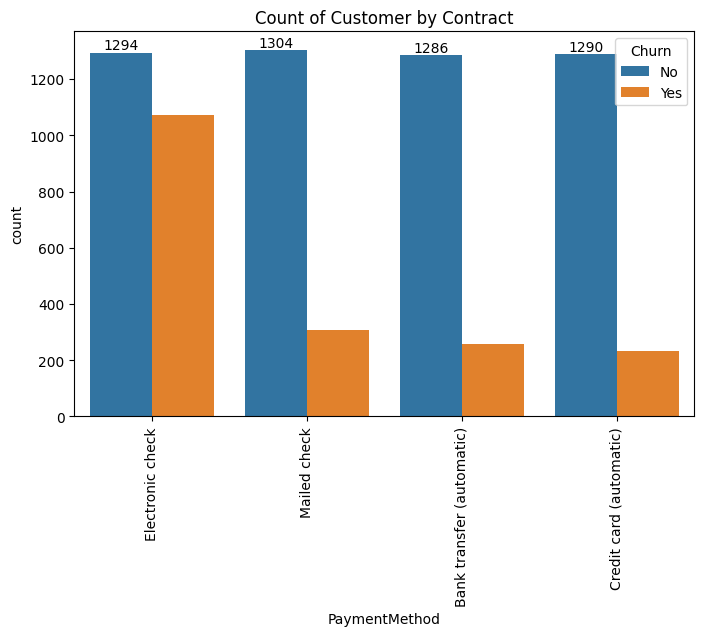

In [113]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x="PaymentMethod",data = df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title("Count of Customer by Contract")

#customer have more churn who have used to pay with electronic check method